In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('/content/AB_NYC_2019.csv')

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
# a curva do price_log é mais distribuida do que a do price normal, por isso a mudança

df['price_log'] = np.log(df.price+1)

Limpeza dos Dados

In [ ]:
# tirando colunas que nao serão usadas
df = df.drop(columns=['name','id' ,'host_id','host_name', 
                                   'last_review','price'])

In [ ]:
mean = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean, inplace=True)

In [ ]:
# nosso previsor no caso será room_type, então analisando aqui quem é o menor incidente

df["room_type"].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
# retirando o menor incidente -> shared room

df.drop(df.loc[df["room_type"] == 'Shared room'].index, inplace=True)

In [ ]:
# copiando room type para colocar na ultima coluna

df["room_types"] = df["room_type"]

In [ ]:
# retirando room type da coluna do meio e deixando room_types no final

df.drop(labels = "room_type", axis = 1, inplace = True)

In [ ]:
df_x = df.iloc[:,:-1]
df_x

,neighbourhood_group,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,Brooklyn,Kensington,40.64749,-73.97237,1,9,0.210000,6,365,5.010635
1,Manhattan,Midtown,40.75362,-73.98377,1,45,0.380000,2,355,5.420535
2,Manhattan,Harlem,40.80902,-73.94190,3,0,1.373221,1,365,5.017280
3,Brooklyn,Clinton Hill,40.68514,-73.95976,1,270,4.640000,1,194,4.499810
4,Manhattan,East Harlem,40.79851,-73.94399,10,9,0.100000,1,0,4.394449
...,...,...,...,...,...,...,...,...,...,...
48889,Queens,Jamaica,40.69137,-73.80844,1,0,1.373221,2,163,4.189655
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,2,0,1.373221,2,9,4.262680
48891,Brooklyn,Bushwick,40.70184,-73.93317,4,0,1.373221,2,36,3.713572
48892,Manhattan,Harlem,40.81475,-73.94867,10,0,1.373221,1,27,4.753590


In [ ]:
from sklearn.preprocessing import LabelEncoder
X_neighbourhood_group = LabelEncoder()
X_neighbourhood = LabelEncoder()

In [ ]:
df_x.iloc[:, 0] = X_neighbourhood_group.fit_transform(df_x.iloc[:, 0])
df_x.iloc[:, 1] = X_neighbourhood.fit_transform(df_x.iloc[:, 1])

In [ ]:
df_x

,neighbourhood_group,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,1,108,40.64749,-73.97237,1,9,0.210000,6,365,5.010635
1,2,127,40.75362,-73.98377,1,45,0.380000,2,355,5.420535
2,2,94,40.80902,-73.94190,3,0,1.373221,1,365,5.017280
3,1,41,40.68514,-73.95976,1,270,4.640000,1,194,4.499810
4,2,61,40.79851,-73.94399,10,9,0.100000,1,0,4.394449
...,...,...,...,...,...,...,...,...,...,...
48889,3,105,40.69137,-73.80844,1,0,1.373221,2,163,4.189655
48890,1,13,40.67853,-73.94995,2,0,1.373221,2,9,4.262680
48891,1,28,40.70184,-73.93317,4,0,1.373221,2,36,3.713572
48892,2,94,40.81475,-73.94867,10,0,1.373221,1,27,4.753590


In [ ]:
Y_room_types = LabelEncoder()
df.iloc[:, -1] = Y_room_types.fit_transform(df.iloc[:, -1])
df_y = df.iloc[:,-1]
df_y

0        1
1        0
2        1
3        0
4        0
        ..
48889    1
48890    1
48891    1
48892    0
48894    1
Name: room_types, Length: 47735, dtype: int64

Normalização e Divisão

In [ ]:
# normalização

scaler = StandardScaler()
df_x = scaler.fit_transform(df_x)

In [ ]:
df_x

array([[-0.91925665,  0.00995967, -1.49937346, ..., -0.03612772,
         1.93629203,  0.37209368],
       [ 0.44443022,  0.28587142,  0.45502138, ..., -0.15612609,
         1.85988401,  0.97003977],
       [ 0.44443022, -0.19334372,  1.47521807, ..., -0.18612568,
         1.93629203,  0.38178648],
       ...,
       [-0.91925665, -1.15177399, -0.49851263, ..., -0.15612609,
        -0.57753198, -1.5200128 ],
       [ 0.44443022, -0.19334372,  1.58073661, ..., -0.18612568,
        -0.6462992 , -0.00287394],
       [ 0.44443022, -0.17882205,  0.64690675, ..., -0.18612568,
        -0.67686241, -0.35696023]])

In [ ]:
# divisão -> 70% treino | 30% teste

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)

## Item 1


fonte: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [ ]:
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# previsao
predictions = logisticRegr.predict(X_test)

In [ ]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.8350673835626004


Matriz de Confusão

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[6392 1174]
 [1188 5567]]


Text(0.5, 257.44, 'Predicted label')

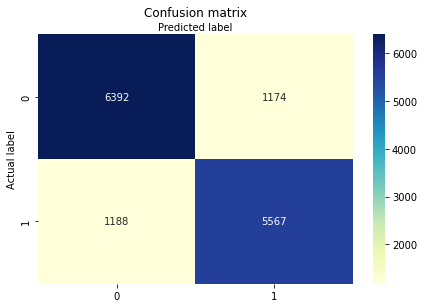

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8350673835626004
Precision: 0.8258418632250408
Recall: 0.8241302738712065


ROC

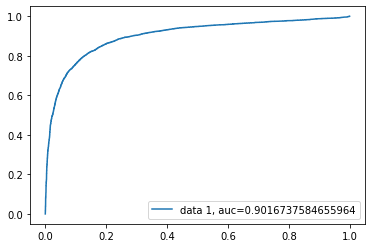

In [ ]:
predictions_proba = logisticRegr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions_proba)
auc = metrics.roc_auc_score(y_test, predictions_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Item 2

kNN
https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 20)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
predictions = classifier.predict(X_test)

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)

Text(0.5, 257.44, 'Predicted label')

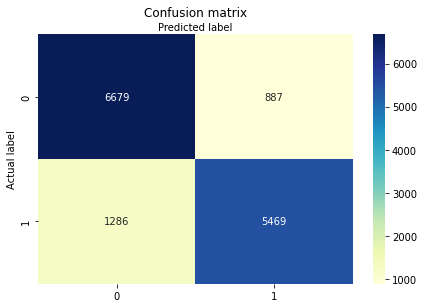

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8482647859786328
Precision: 0.8604468219005664
Recall: 0.8096225018504811


com 5: 

Accuracy: 0.8285035961175895
Precision: 0.8150373735893303
Recall: 0.8232420429311621

com 6: 

Accuracy: 0.8244535996089658
Precision: 0.8445166531275385
Recall: 0.7695040710584752

com 7:

Accuracy: 0.8294113539557294
Precision: 0.8145608403851765
Recall: 0.8264988897113249

com 8:

Accuracy: 0.8278751483834927
Precision: 0.8377952755905512
Recall: 0.7875647668393783

com 9:

Accuracy: 0.8301794567418477
Precision: 0.8141258538003198
Recall: 0.8293116210214656

com 12:

Accuracy: 0.8311570421059982
Precision: 0.8305136412132297
Recall: 0.8066617320503331

com 13: 

Accuracy: 0.8318553173661057
Precision: 0.8131393171012823
Recall: 0.8355292376017764

com 20: 

Accuracy: 0.8352768661406327
Precision: 0.8244759374077355
Recall: 0.8267949666913398



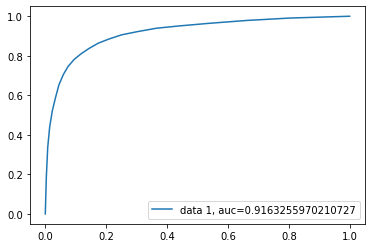

In [ ]:
predictions_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions_proba)
auc = metrics.roc_auc_score(y_test, predictions_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

SVM

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
predictions = clf.predict(X_test)

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)

Text(0.5, 257.44, 'Predicted label')

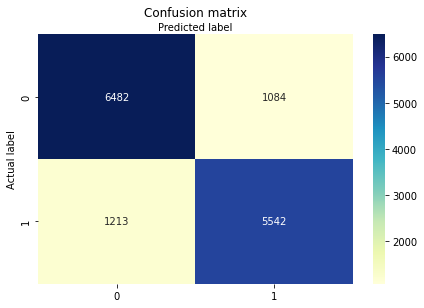

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8396061727532993
Precision: 0.8364020525203743
Recall: 0.8204293116210215


In [ ]:
import numpy as np
import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

roc_auc = auc(fpr, tpr)

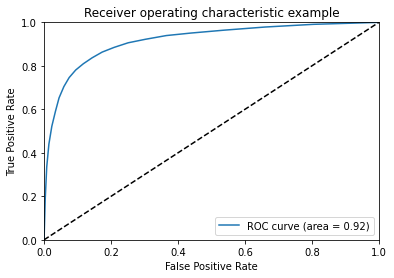

In [ ]:
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

# https://go2analytics.wordpress.com/2016/07/26/implement-classification-in-python-and-roc-plotting-svc-example/

QDA
https://www.datasklr.com/select-classification-methods/linear-and-quadratic-discriminant-analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
#Base QDA Without any tuning
QDA_model_default = QuadraticDiscriminantAnalysis()
QDA_model_default.fit(X_train, y_train)
predictions_QDA_default = QDA_model_default.predict(X_test)

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions_QDA_default)

Text(0.5, 257.44, 'Predicted label')

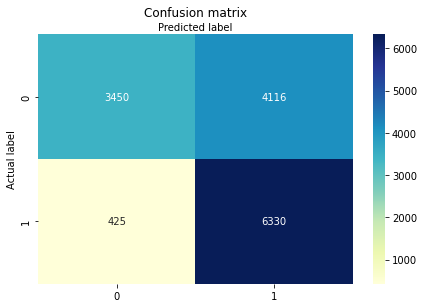

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions_QDA_default))
print("Precision:",metrics.precision_score(y_test, predictions_QDA_default))
print("Recall:",metrics.recall_score(y_test, predictions_QDA_default))

Accuracy: 0.6829132043851687
Precision: 0.6059735784032165
Recall: 0.9370836417468542


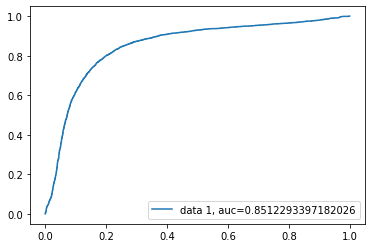

In [ ]:
predictions_proba = QDA_model_default.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions_proba)
auc = metrics.roc_auc_score(y_test, predictions_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#Parameter tuning with GridSearchCV 
#######################
### QDA
#######################

estimator_3 = QuadraticDiscriminantAnalysis()
parameters_3 = {
    'reg_param': (0.00001, 0.0001, 0.001,0.01, 0.1), 
    'store_covariance': (True, False),
    'tol': (0.0001, 0.001,0.01, 0.1), 
                   }
# with GridSearch
grid_search_qda = GridSearchCV(
    estimator=estimator_3,
    param_grid=parameters_3,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
qda_1=grid_search_qda.fit(X_train, y_train)
predictions_QDA_tuning = qda_1.predict(X_test)

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions_QDA_tuning)

Text(0.5, 257.44, 'Predicted label')

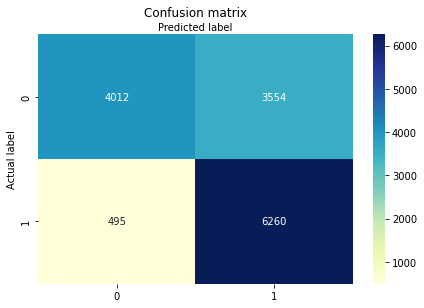

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions_QDA_tuning))
print("Precision:",metrics.precision_score(y_test, predictions_QDA_tuning))
print("Recall:",metrics.recall_score(y_test, predictions_QDA_tuning))

Accuracy: 0.7172683471824594
Precision: 0.6378642755247605
Recall: 0.926720947446336


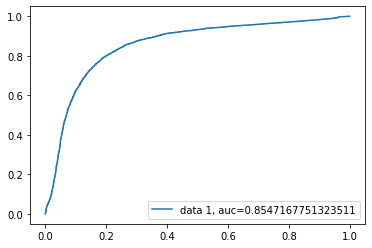

In [ ]:
predictions_proba = grid_search_qda.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions_proba)
auc = metrics.roc_auc_score(y_test, predictions_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()